# Web Scrapping Kurs Japan Yen  Januari - November 2019

Halo semua! Pada halaman ini, saya akan mencoba untuk melakukan pengambilan data dari sebuah web atau yang lebih dikenal dengan web-scrapping. Proses web-scrapping ini dilakukan dengan menggunakan bahasa pemrograman Python dan menggunakan library requests, pandas, dan beautifulsoup. Saya akan melakukan pengambilan data pada sebuah website jual-beli uang asing (money changer) dan mengambil data kurs mata uang Yen pada tahun 2019 (Januari-Desember). Setelah itu, saya akan mencoba untuk membuat grafik perubahan kurs dan melakukan analisa terhadap grafik tersebut. Di akhir halaman, saya akan membuat kesimpulan dari analisis ini. 

## 1. Import Library Pandas, Requests, Matplotlib, dan BeautifulSoup

Langkah pertama dalam proses web-scrapping ini adalah load semua library yang dibutuhkan dalam pemrograman ini. Dalam hal ini saya kana import library pandas, requests, matplotlib dan beautifulsoup. 

In [34]:
import pandas as pd

In [35]:
import matplotlib.pyplot as plt

Library requests ini berguna untuk mengambil data dari alamat atau url tertentu

In [36]:
import requests
url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=30-12-2019')

Import beautifulsoup dan lakukan pengambilan konten dari url yang sudah ditentukan 

In [37]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Tentukan object dan atribut yang diinginkan pada website yang dituju. Cek atribut dan informasi dengan cara menekan tombol F12 atau klik kanan-inspect pada halaman yang diinginkan.

In [38]:
table = soup.find('table', attrs={'class':'table'})
print(table.prettify()[1:500])

table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr>
  <td>
   27 Desember 2019
  </td>
  <td>
   128,11
  </td>
  <td>
   126,83
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   26 Desember 2019
  </td>
  <td>
   128,27
  </td>
  <td>
   126,98
  </td>
 </tr>
 <tr>
  <td>
   23 Desember 2019
  </td>
  <td>
   128,


## 2. Melakukan Ekstrasi dari Tabel HTML Web

Pada tahap ini, saya akan mencoba mengekstrak informasi dari web dengan cara mencari semua kode html yang mengandung huruf 'tr' di dalamnya. 'tr' ini adalah sebuah command html yang menunjukan sebuah baris pada sebuah tabel html. 

In [39]:
tr = table.find_all('tr')

Kemudian, buat sebuah tuple. Saya akan memberikan nama 'temp' untuk tuple ini. SAmbil ketiga kolom pada tabel (karena tabel yang diambil terdiri dari 3 kolom). Kolom pertama adalah tanggal dengan index 0 (bahasa python memulai index dari 0), lalu yang kedua adalah kolom harga ask (harga jual) dengan index 1, dan kolom ketiga adalah kolom bid (harga beli) dengan index 2. Di akhir loop, saya melakukan append untuk membuat sebuah list yang berisi 3 kolom tadi.

In [40]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get tanggal
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip() #for removing the excess whitespace
    
    #get ask
    ask = row.find_all('td')[1].text
    ask = ask.strip() #for removing the excess whitespace
    
    #get bid
    bid = row.find_all('td')[2].text
    bid = bid.strip() 
    
    temp.append((tanggal,ask,bid)) 
    
temp 

[('30\xa0Desember\xa02019', '128,30', '127,02'),
 ('27\xa0Desember\xa02019', '128,11', '126,83'),
 ('26\xa0Desember\xa02019', '128,27', '126,98'),
 ('23\xa0Desember\xa02019', '128,39', '127,10'),
 ('20\xa0Desember\xa02019', '128,63', '127,34'),
 ('19\xa0Desember\xa02019', '128,24', '126,93'),
 ('18\xa0Desember\xa02019', '128,64', '127,32'),
 ('17\xa0Desember\xa02019', '128,62', '127,33'),
 ('16\xa0Desember\xa02019', '128,67', '127,36'),
 ('13\xa0Desember\xa02019', '128,30', '127,02'),
 ('12\xa0Desember\xa02019', '130,04', '128,71'),
 ('11\xa0Desember\xa02019', '129,65', '128,34'),
 ('10\xa0Desember\xa02019', '129,56', '128,26'),
 ('09\xa0Desember\xa02019', '129,76', '128,44'),
 ('06\xa0Desember\xa02019', '129,78', '128,45'),
 ('05\xa0Desember\xa02019', '130,10', '128,77'),
 ('04\xa0Desember\xa02019', '130,79', '129,45'),
 ('03\xa0Desember\xa02019', '130,15', '128,82'),
 ('02\xa0Desember\xa02019', '129,36', '128,04'),
 ('29\xa0November\xa02019', '129,44', '128,12'),
 ('28\xa0November\xa

## 3. Membuat dataframe dari data yang sudah diekstrak

Setelah berhasil membuat tupple, saya akan mengubah tuple tersebut menjadi sebuah dataframe. Namun, karena data masih belum berurut dari bulan Januari, saya akan mengubah urutan bulan dari januari menggunakan syntax [::-1]

In [41]:
temp = temp [::-1]

Buat dataframe nya

In [42]:
df = pd.DataFrame(temp, columns = ('Tanggal','Ask','Bid'))
df.head()

,Tanggal,Ask,Bid
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"


## 4. Mengganti "," menjadi "."

Dapat dilihat pada kolom ask dan bid, harga masih ditulis dengan ','. Hal ini akan menghalangi perubahan tipe data object menjadi float karena bahas python tidak mengenali ',' sebagai pemisah pecahan. Untuk itu, saya akan mengubah ',' menjad '.' dengan menggunakan fungsi regex.

In [43]:
df.Ask.replace(to_replace = ',',value = '.',regex=True, inplace=True) 

In [44]:
df.Bid.replace(to_replace = ',',value = '.',regex=True, inplace=True) 

## 5. Mengganti bahasa Indonesia dalam bulan menjadi Bahasa Inggris

Kolom tanggal masih dalam bahasa Indonesia. Untuk mengubah tipe data object menjadi datetime, bahasa dalam tanggal harus diubah menjadi bahasa Inggris. Saya juga menggunakan fungsi regex dalam pengubahan bahasa tanggal ini. 

In [45]:
df.Tanggal.replace(to_replace = 'Oktober',value = 'October',regex=True, inplace=True) 
df.Tanggal.replace(to_replace = 'Agustus',value = 'August',regex=True, inplace=True) 
df.Tanggal.replace(to_replace = 'Desember',value = 'December',regex=True, inplace=True) 
df.Tanggal.replace(to_replace = 'Juli',value = 'July',regex=True, inplace=True) 
df.Tanggal.replace(to_replace = 'Juni',value = 'June',regex=True, inplace=True) 
df.Tanggal.replace(to_replace = 'Januari',value = 'January',regex=True, inplace=True) 
df.Tanggal.replace(to_replace = 'Februari',value = 'February',regex=True, inplace=True) 
df.Tanggal.replace(to_replace = 'Maret',value = 'March',regex=True, inplace=True) 
df.Tanggal.replace(to_replace = 'Mei',value = 'May',regex=True, inplace=True) 

## 6. Mengganti tipe data 'object' menjadi 'float64'

Setelah ',' diganti menjadi '.' , tipe data bisa diubah menjadi float64. 

In [46]:
df[['Ask','Bid']] = df[['Ask','Bid']].astype('float64')
df.dtypes

Tanggal     object
Ask        float64
Bid        float64
dtype: object

In [47]:
df.head()

,Tanggal,Ask,Bid
0,02 January 2019,132.89,131.54
1,03 January 2019,135.44,134.08
2,04 January 2019,133.51,132.17
3,07 January 2019,130.86,129.51
4,08 January 2019,129.84,128.52


## 7. Mengekstrak Nama 'Bulan' 

Saya akan membuat kolom bulan yang berisi bulan pada kolom tanggal. Untuk mempermudah dalam pembacaan, saya akan menyingkat nama bulan menjadi tiga huruf saja. 

In [48]:
df['Bulan']=pd.to_datetime(df['Tanggal']).dt.strftime('%b').astype('category')
df.head()

,Tanggal,Ask,Bid,Bulan
0,02 January 2019,132.89,131.54,Jan
1,03 January 2019,135.44,134.08,Jan
2,04 January 2019,133.51,132.17,Jan
3,07 January 2019,130.86,129.51,Jan
4,08 January 2019,129.84,128.52,Jan


## 8. Plot menggunakan 'matplotlib'

Setelah dataframe sudah siap digunakan dan sudah rapi, saatnya untuk membuat grafik garis untuk memberikan gambaran perubahan nilai kurs Yen dari bulan Januari-Desember 2019. Saya menggunakan library matlplotlib.

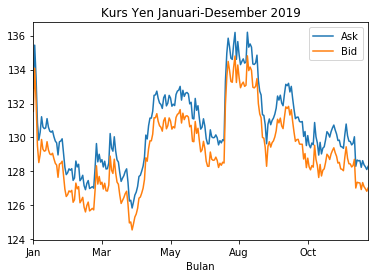

In [49]:
df.plot(kind = 'line', x = 'Bulan', y=['Ask','Bid'], title ='Kurs Yen Januari-Desember 2019')

## 9. Analisa 

Berdasarkan grafik yang sudah dibuat, dapat dilihat bahwa nilai kurs yen sepanjang tahun 2019 sangat fluktuatif. Nilai kurs paling tinggi adalah sekitar 136 dan terjadi pada bulan Agustus, sedangkan paling rendah ada di bulan April dengan nilai kurang lebih 125. 

Nilai kurs pada periode kuartil pertama Januari-Maret menunjukan kecendurangan adanya penurunan dari 135 poin menjadi sekitar 127 poin. Hal ini menunjukan adanya penurunan kualitas ekonomi di negara Jepang pada waktu itu. Namun demikian, pada kuartil kedua, April- Juni, nilai kurs kembali naik menjadi sekirar 132 poin. Periode ini merupakan musim semi liburan sehingga terjadi penginkatan devisa negara di Jepang akibat meningkatnya angka turis yang datang. 

Hal yang cukup unik terjadi pada periode Juli-September. Nilai kurs Yen pada bulan Juli ada pada angka 128 kemudian naik menjadi 136 poin pada bulan Agustus dan kembali lagi ke 128 poin pada bulan September. Perubahan nilai ini seakan akan adanya suntikan sementara pada perekonomian Jepang yang mengakibatkan lonjakan yang cukup tinggi pada periode yang singkat. Nilai kurs Jepang kian menurun dari bulan September sampai Desember 2019. 

Secara keseluruhan nilai kurs Yen pada tahun 2019 mengalami penurunan. Nilai kurs dibuka pada awal tahun di 135 poin dan diakhiri pada bulan Dsember dengan nilai 127 poin. Meskipun demikian, terjadi pergerakan yang cukup dinamis sepanjang tahun 2019 yang disebakan oleh keadaan ekonomi dan juga politik negara Jepang itu sendiri.

## 10. Kesimpulan

Proses web-scrapping dengan menggunakan bahas Python dapat dilakukan dengan cukup mudah dan cepat. Tingkat kesulitan dari proses ini ditentukan dari bentuk data atau tabel yang ingin diambil. Ketersediaan kode html di setiap website berbeda-beda tergantung pada pihak pengembang (developer) website itu sendiri. Oleh karena itu, untuk melakukan web-scrapping, disarankan untuk memahami dulu barisan kode html suatu website sehingga kita tahu bagian mana yang harus diambil dan dapat mengolah data  sesuai keinginan. 

Demikian contoh proses web-scrapping menggunakan Python. Semoga halaman ini bermanfaat bagi pembaca dan dapat memberi padangan secara umum tentang proses web-scrapping itu sendiri. 
Terima kasih dan sampa jumpa!


Alfado Dhusi Sembiring

Profil saya : https://www.linkedin.com/in/alfado